In [1]:
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv('wine.csv')
wine
wine.dropna()
print(wine.keys())
wine['Total phenols'].fillna(wine['Total phenols'].mean)

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


0      2.80
1      2.65
2      2.80
3      3.85
4      2.80
       ... 
173    1.68
174    1.80
175    1.59
176    1.65
177    2.05
Name: Total phenols, Length: 178, dtype: float64

In [3]:
X = wine.iloc[:,1:]
y = wine.iloc[:,0]
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: int64

# Holdout

In [4]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_treino.shape, y_treino.shape)
print(X_teste.shape, y_teste.shape)

(124, 13) (124,)
(54, 13) (54,)


In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation="relu", hidden_layer_sizes=(10, 20,))
mlp.fit(X_treino, y_treino)
mlp.predict(X_teste)
mlp.score(X_teste, y_teste)

0.6111111111111112

# K-fold

In [6]:
from sklearn.model_selection import KFold

resultados = []
kf = KFold(n_splits=10, shuffle=True)
for index_treino, index_teste in kf.split(X):
    #X_treino, X_teste = X[index_treino], X[index_teste]
    #y_treino, y_teste = y[index_treino], y[index_teste]
    X_treino, X_teste = X.iloc[index_treino], X.iloc[index_teste]
    y_treino, y_teste = y.iloc[index_treino], y.iloc[index_teste]
    mlp.fit(X_treino, y_treino)
    resultados.append(mlp.score(X_teste, y_teste))
print(sum(resultados)/len(resultados))

0.4199346405228758


# Métricas

In [7]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

mlp = MLPClassifier(activation="relu", hidden_layer_sizes=(10,))
mlp.fit(X_treino, y_treino)
mlp.score(X_teste, y_teste)

0.07407407407407407

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = mlp.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')

0.09207459207459208

In [9]:
recall_score(y_teste, y_pred, average='macro')

0.08897243107769422

In [10]:
f1_score(y_teste, y_pred, average='macro')

0.0903342366757001

# Estimação dos parâmetros (kNN, SVM, MLP)

## kNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

valores_k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] #list(range(1,16))
resultados_knn = []

for k in valores_k:
    resultados_k = []
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=10, shuffle=True)
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino.iloc[index_train], X_treino.iloc[index_valid]
        y_train, y_validacao = y_treino.iloc[index_train], y_treino.iloc[index_valid]
        knn.fit(X_train, y_train)
        resultados_k.append(knn.score(X_validacao, y_validacao))
    resultados_knn.append(sum(resultados_k)/len(resultados_k))
resultados_knn

[0.7083333333333334,
 0.7032051282051281,
 0.7,
 0.6615384615384615,
 0.6525641025641026,
 0.6852564102564103,
 0.6935897435897436,
 0.6294871794871796,
 0.6782051282051282,
 0.6782051282051282,
 0.694871794871795,
 0.6788461538461539,
 0.6846153846153846,
 0.6692307692307693,
 0.667948717948718]

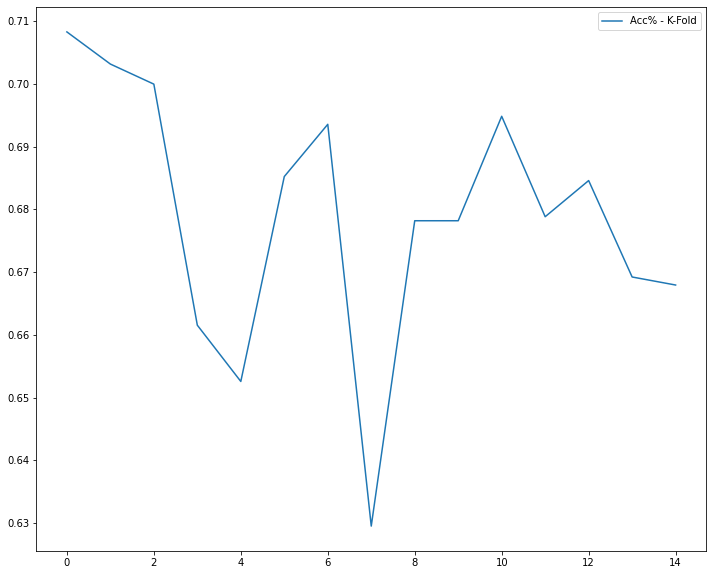

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(resultados_knn, label='Acc% - K-Fold')
plt.legend()
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_treino, y_treino)
knn.score(X_teste, y_teste)

0.7962962962962963

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = knn.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')

0.7886382623224728

In [15]:
recall_score(y_teste, y_pred, average='macro')

0.7903091060985798

In [16]:
f1_score(y_teste, y_pred, average='macro')

0.7880952380952381

### SVM

In [17]:
from sklearn.svm import SVC
valores_kernel = ["linear", "poly", "rbf", "sigmoid"]
resultados_svm = []

for kernel in valores_kernel:
    resultados_kernel = []
    svc = SVC(kernel=kernel)
    kf = KFold(n_splits=10, shuffle=True)
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino.iloc[index_train], X_treino.iloc[index_valid]
        y_train, y_validacao = y_treino.iloc[index_train], y_treino.iloc[index_valid]
        svc.fit(X_train, y_train)
        resultados_kernel.append(svc.score(X_validacao, y_validacao))
    resultados_svm.append(sum(resultados_kernel)/len(resultados_kernel))
resultados_svm

[0.9352564102564103,
 0.6185897435897435,
 0.6538461538461539,
 0.24230769230769234]

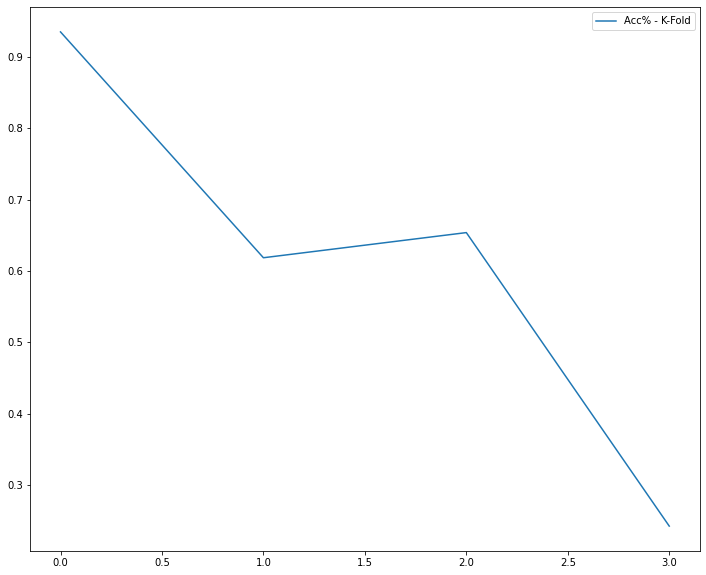

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(resultados_svm, label='Acc% - K-Fold')
plt.legend()
plt.show()

In [19]:
svc = SVC(kernel="linear")
svc.fit(X_treino, y_treino)
svc.score(X_teste, y_teste)

0.9814814814814815

In [20]:
y_pred = svc.predict(X_teste)

ps = precision_score(y_teste, y_pred, average='macro')
rs = recall_score(y_teste, y_pred, average='macro')
f1 = f1_score(y_teste, y_pred, average='macro')
print(f'Precision: {ps} \t Recall: {rs} \t F1: {f1}')

Precision: 0.9777777777777779 	 Recall: 0.9841269841269842 	 F1: 0.9803756658256239


### Redes Neurais

In [21]:
from sklearn.neural_network import MLPClassifier
valores_ativacao = ["identity", "logistic", "tanh", "relu"]
resultados_mlp = []

for ativacao in valores_ativacao:
    resultados_ativacao = []
    mlp = MLPClassifier(activation=ativacao)
    kf = KFold(n_splits=10, shuffle=True)
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino.iloc[index_train], X_treino.iloc[index_valid]
        y_train, y_validacao = y_treino.iloc[index_train], y_treino.iloc[index_valid]
        mlp.fit(X_train, y_train)
        resultados_ativacao.append(svc.score(X_validacao, y_validacao))
    resultados_mlp.append(sum(resultados_ativacao)/len(resultados_ativacao))
resultados_mlp

C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

[0.9923076923076923,
 0.9923076923076923,
 0.9916666666666668,
 0.9923076923076923]

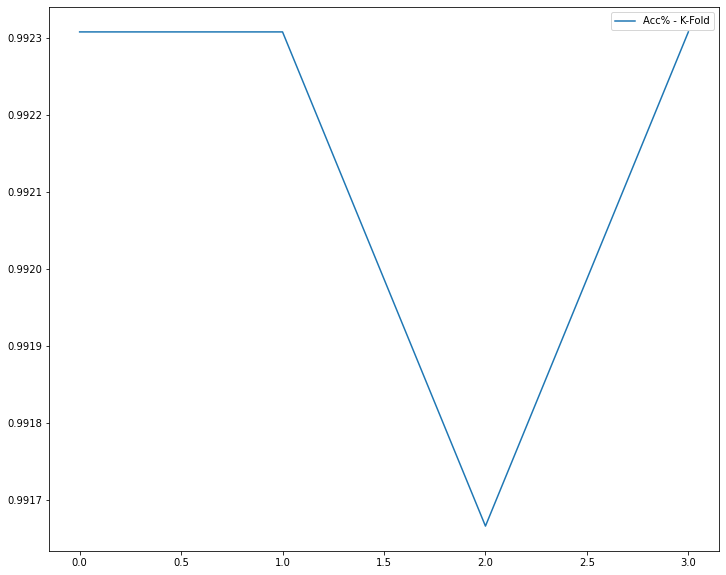

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(resultados_mlp, label='Acc% - K-Fold')
plt.legend()
plt.show()

In [23]:
mlp = MLPClassifier(activation="tanh")
mlp.fit(X_treino, y_treino)
mlp.score(X_teste, y_teste)

C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9444444444444444

In [24]:
y_pred = svc.predict(X_teste)

ps = precision_score(y_teste, y_pred, average='macro')
rs = recall_score(y_teste, y_pred, average='macro')
f1 = f1_score(y_teste, y_pred, average='macro')
print(f'Precision: {ps} \t Recall: {rs} \t F1: {f1}')

Precision: 0.9777777777777779 	 Recall: 0.9841269841269842 	 F1: 0.9803756658256239
